In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

# 6.2.6 Got the city weather data

In [7]:
# Import the requests library
import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=177bd30dd65b9c531359585c3e1ece81


In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop thourg all the cities in our list
for i in range(len(cities)):
    
    # Group the cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities  in the list:
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each coty.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, adn set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | khatanga
Processing Record 2 of Set 13 | oksfjord
Processing Record 3 of Set 13 | marcona
City not found. Skipping...
Processing Record 4 of Set 13 | hermanus
Processing Record 5 of Set 13 | port lincoln
Processing Record 6 of Set 13 | thinadhoo
Processing Record 7 of Set 13 | nemuro
Processing Record 8 of Set 13 | katsuura
Processing Record 9 of Set 13 | bluff
Processing Record 10 of Set 13 | lebu
Processing Record 11 of Set 13 | mataura
Processing Record 12 of Set 13 | avarua
Processing Record 13 of Set 13 | honiara
Processing Record 14 of Set 13 | albany
Processing Record 15 of Set 13 | kodiak
Processing Record 16 of Set 13 | port alfred
Processing Record 17 of Set 13 | sola
Processing Record 18 of Set 13 | conde
Processing Record 19 of Set 13 | yarega
Processing Record 20 of Set 13 | arraial do cabo
Processing Record 21 of Set 13 | saldanha
Processing Record 22 of Set 13 | east london
Processing Record 23 of Set 13 | ingham
Processing Record 24 of Se

Processing Record 35 of Set 16 | jaisalmer
Processing Record 36 of Set 16 | thompson
Processing Record 37 of Set 16 | hammerfest
Processing Record 38 of Set 16 | sur
Processing Record 39 of Set 16 | conakry
Processing Record 40 of Set 16 | avera
Processing Record 41 of Set 16 | trinidad
Processing Record 42 of Set 16 | yatou
Processing Record 43 of Set 16 | jamestown
Processing Record 44 of Set 16 | amalapuram
Processing Record 45 of Set 16 | cabo san lucas
Processing Record 46 of Set 16 | ancud
Processing Record 47 of Set 16 | vanimo
Processing Record 48 of Set 16 | camacha
Processing Record 49 of Set 16 | oromocto
Processing Record 50 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 17 | caravelas
Processing Record 2 of Set 17 | antalaha
Processing Record 3 of Set 17 | istria
Processing Record 4 of Set 17 | carbonia
Processing Record 5 of Set 17 | bogandinskiy
Processing Record 6 of Set 17 | fortuna
Processing Record 7 of Set 17 | kapuskasing
Processing Reco

Processing Record 16 of Set 20 | la asuncion
Processing Record 17 of Set 20 | alugan
Processing Record 18 of Set 20 | sarkand
Processing Record 19 of Set 20 | norman wells
Processing Record 20 of Set 20 | kaitangata
Processing Record 21 of Set 20 | kamaishi
Processing Record 22 of Set 20 | marquette
Processing Record 23 of Set 20 | riyadh
Processing Record 24 of Set 20 | algeciras
Processing Record 25 of Set 20 | atar
Processing Record 26 of Set 20 | ruteng
Processing Record 27 of Set 20 | lucapa
Processing Record 28 of Set 20 | kisesa
Processing Record 29 of Set 20 | sao filipe
Processing Record 30 of Set 20 | villa guerrero
Processing Record 31 of Set 20 | finschhafen
Processing Record 32 of Set 20 | ocos
Processing Record 33 of Set 20 | bokspits
City not found. Skipping...
Processing Record 34 of Set 20 | cerritos
Processing Record 35 of Set 20 | rabo de peixe
Processing Record 36 of Set 20 | praia da vitoria
Processing Record 37 of Set 20 | gorontalo
Processing Record 38 of Set 20 

Processing Record 35 of Set 23 | kangaatsiaq
Processing Record 36 of Set 23 | korla
Processing Record 37 of Set 23 | vila do maio
Processing Record 38 of Set 23 | tocopilla
Processing Record 39 of Set 23 | sao jose
Processing Record 40 of Set 23 | balkhash
Processing Record 41 of Set 23 | arvika
Processing Record 42 of Set 23 | bolshiye uki
City not found. Skipping...
Processing Record 43 of Set 23 | yumen
Processing Record 44 of Set 23 | asosa
Processing Record 45 of Set 23 | bomet
Processing Record 46 of Set 23 | daru
Processing Record 47 of Set 23 | hervey bay
Processing Record 48 of Set 23 | aswan
Processing Record 49 of Set 23 | muzhi
Processing Record 50 of Set 23 | tual
Processing Record 1 of Set 24 | berlevag
Processing Record 2 of Set 24 | san javier
Processing Record 3 of Set 24 | merauke
Processing Record 4 of Set 24 | andijon
Processing Record 5 of Set 24 | muroto
Processing Record 6 of Set 24 | nanortalik
Processing Record 7 of Set 24 | baruun-urt
Processing Record 8 of Se

In [14]:
len(city_data)

556

# 6.2.7 Create a DataFrame of City Weather Data

In [15]:
import pandas as pd

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,51.21,61,100,11.03,RU,2022-07-01 14:39:05
1,Oksfjord,70.2396,22.3479,71.67,53,28,3.83,NO,2022-07-01 14:39:05
2,Hermanus,-34.4187,19.2345,68.61,54,2,12.10,ZA,2022-07-01 14:35:50
3,Port Lincoln,-34.7333,135.8667,52.63,64,100,8.79,AU,2022-07-01 14:39:06
4,Thinadhoo,0.5333,72.9333,80.56,80,23,8.90,MV,2022-07-01 14:39:06
5,Nemuro,43.3236,145.5750,54.36,96,24,10.71,JP,2022-07-01 14:39:06
6,Katsuura,35.1333,140.3000,76.23,88,0,13.58,JP,2022-07-01 14:39:07
7,Bluff,-46.6000,168.3333,47.80,76,88,18.54,NZ,2022-07-01 14:39:07
8,Lebu,-37.6167,-73.6500,50.07,79,80,19.48,CL,2022-07-01 14:39:07
9,Mataura,-46.1927,168.8643,47.48,93,100,5.77,NZ,2022-07-01 14:39:08


In [17]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-07-01 14:39:05,71.9667,102.5000,51.21,61,100,11.03
1,Oksfjord,NO,2022-07-01 14:39:05,70.2396,22.3479,71.67,53,28,3.83
2,Hermanus,ZA,2022-07-01 14:35:50,-34.4187,19.2345,68.61,54,2,12.10
3,Port Lincoln,AU,2022-07-01 14:39:06,-34.7333,135.8667,52.63,64,100,8.79
4,Thinadhoo,MV,2022-07-01 14:39:06,0.5333,72.9333,80.56,80,23,8.90
5,Nemuro,JP,2022-07-01 14:39:06,43.3236,145.5750,54.36,96,24,10.71
6,Katsuura,JP,2022-07-01 14:39:07,35.1333,140.3000,76.23,88,0,13.58
7,Bluff,NZ,2022-07-01 14:39:07,-46.6000,168.3333,47.80,76,88,18.54
8,Lebu,CL,2022-07-01 14:39:07,-37.6167,-73.6500,50.07,79,80,19.48
9,Mataura,NZ,2022-07-01 14:39:08,-46.1927,168.8643,47.48,93,100,5.77


In [18]:
# Create the output CSV file
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

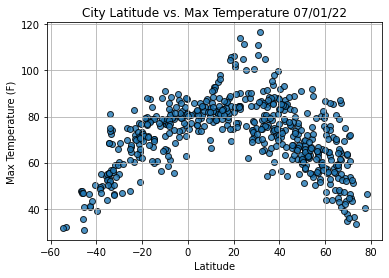

In [30]:
# Import time module
import time

# Build scatter plot for latiutude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig1.png")
          
# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

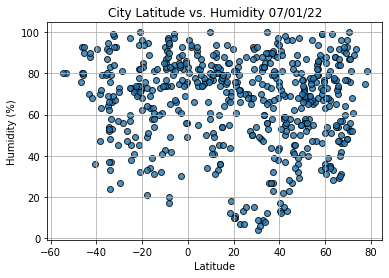

In [29]:
# Build scatter plot for latiutude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig2.png")
          
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

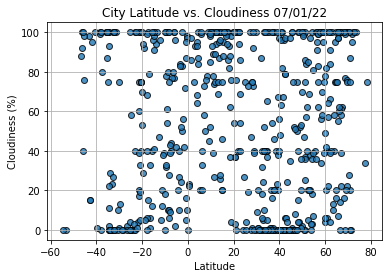

In [28]:
# Build scatter plot for latiutude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig3.png")
          
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

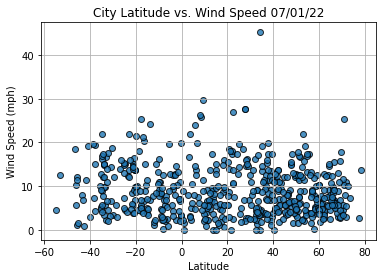

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()